<a href="https://colab.research.google.com/github/208B1A0428/RESUME-PROJECTS/blob/master/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow_decision_forests

  Using cached tensorflow_decision_forests-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)


In [ ]:
pip install --upgrade tensorflow


In [ ]:
pip install tensorflow_decision_forests==1.4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 21.3 MB/s eta 0:00:00


**import the required libraries**

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

**Load the Dataset**

In [ ]:
df=pd.read_csv("/content/train.csv")
df.shape

(1460, 81)

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Visualization**

<ipython-input-12-d2ea82fc16e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'],color='m',bins=100,hist_kws={'alpha':0.4});


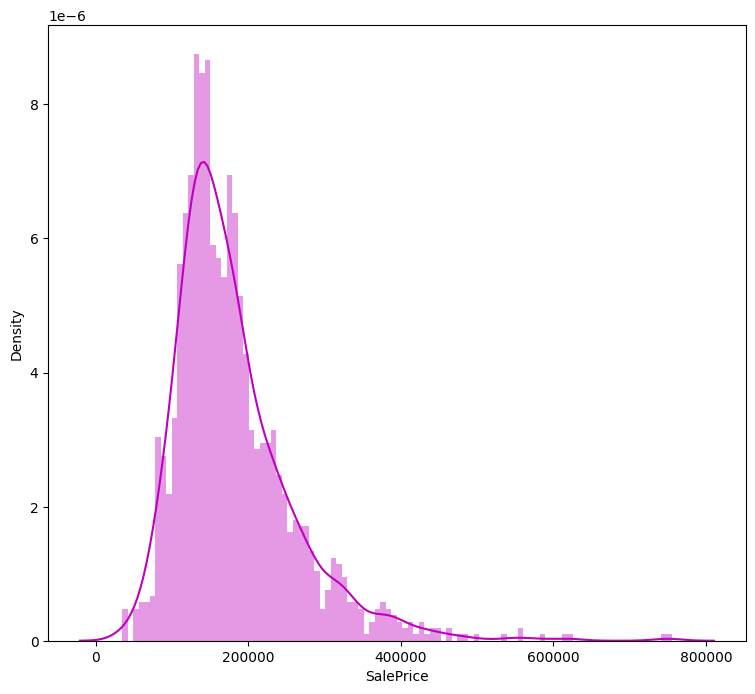

In [ ]:
plt.figure(figsize=(9,8))
sns.distplot(df['SalePrice'],color='m',bins=100,hist_kws={'alpha':0.4});


In [ ]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [ ]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_num=df_num.drop('Id',axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


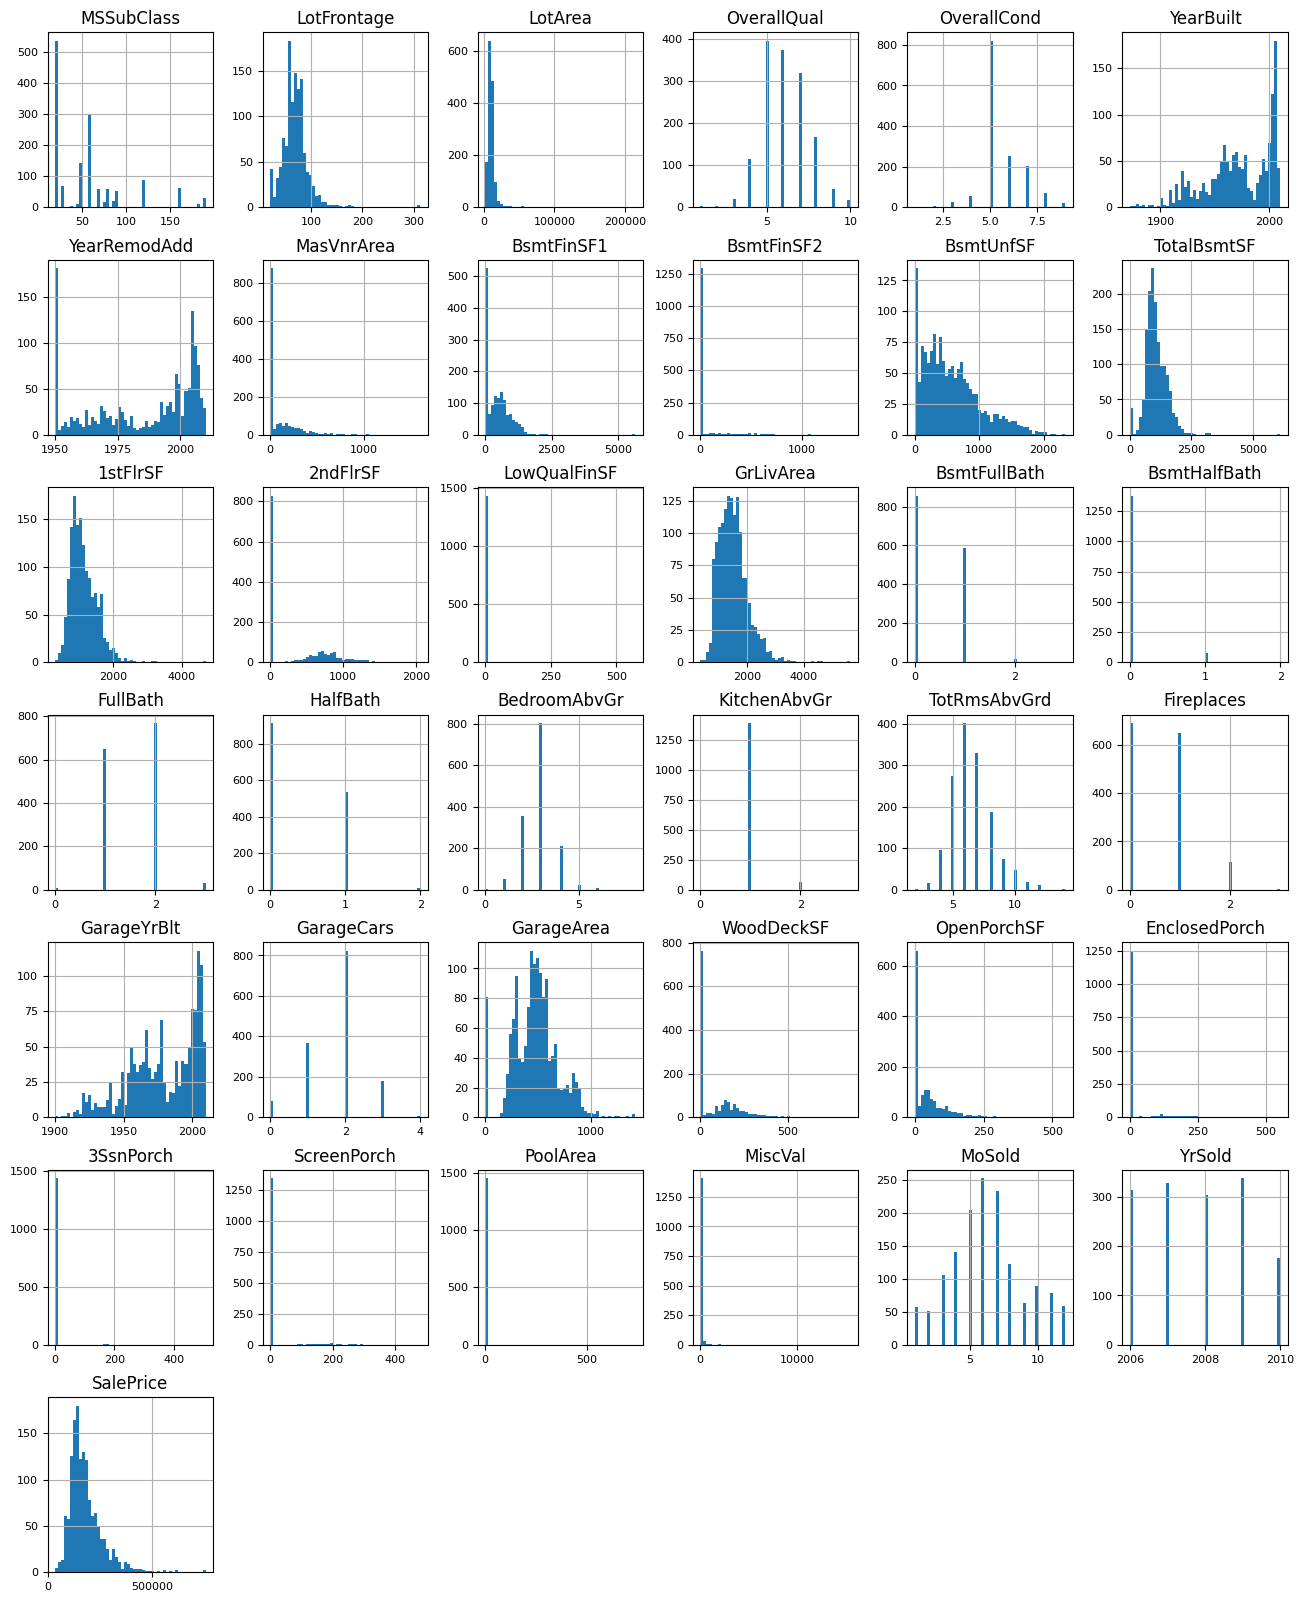

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**split the dataset**

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1028 examples in training, 432 examples in testing.


**convert the pandas dataset into Tensorflow dataset**

In [ ]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [ ]:
rf=tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf.compile('MSE')

Use /tmp/tmpcbka_zc4 as temporary training directory


In [ ]:
rf.fit(x=valid_ds)

Reading training dataset...
Training dataset read in 0:00:00.091914. Found 432 examples.
Training model...
Model trained in 0:00:01.793026
Compiling model...
Model compiled.


**Visualize the model**

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf,tree_idx=0,max_depth=3)

**Evaluate the model on the Out of bag (OOB) data and the validation dataset**

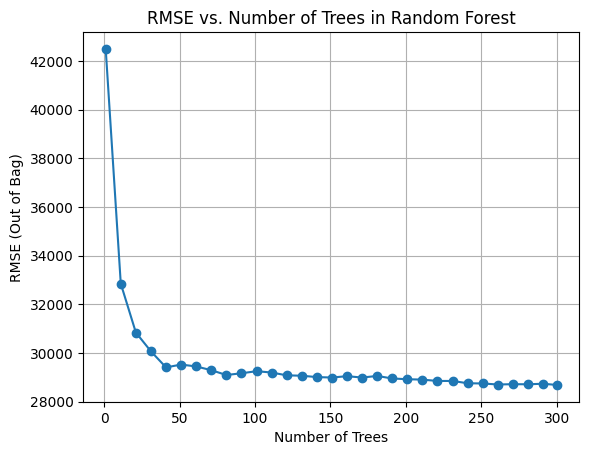

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
num_trees = [log.num_trees for log in logs]
rmse_scores = [log.evaluation.rmse for log in logs]

plt.plot(num_trees, rmse_scores, marker='o')  # Using markers for better visualization
plt.xlabel("Number of Trees")
plt.ylabel("RMSE (Out of Bag)")
plt.title("RMSE vs. Number of Trees in Random Forest")
plt.grid(True)
plt.show()

In [ ]:
inspector=rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1020, accuracy=None, loss=None, rmse=28683.691292554184, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation=rf.evaluate(x=valid_ds,return_dict=True)
for name,value in evaluation.items():
  print(f"{name}:{value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - MSE: 280357536.0000
loss:0.0000
MSE:280357536.0000


In [ ]:
print("Available importance variables:")
for i in inspector.variable_importances().keys():
  print(i)

Available importance variables:
SUM_SCORE
NUM_AS_ROOT
NUM_NODES
INV_MEAN_MIN_DEPTH


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #63), 117.0),
 ("ExterQual" (4; #22), 45.0),
 ("Neighborhood" (4; #60), 39.0),
 ("GrLivArea" (1; #38), 32.0),
 ("GarageCars" (1; #32), 28.0),
 ("KitchenQual" (4; #45), 12.0),
 ("TotalBsmtSF" (1; #74), 8.0),
 ("BsmtQual" (4; #14), 7.0),
 ("YearBuilt" (1; #77), 6.0),
 ("1stFlrSF" (1; #0), 3.0),
 ("GarageArea" (1; #31), 3.0)]

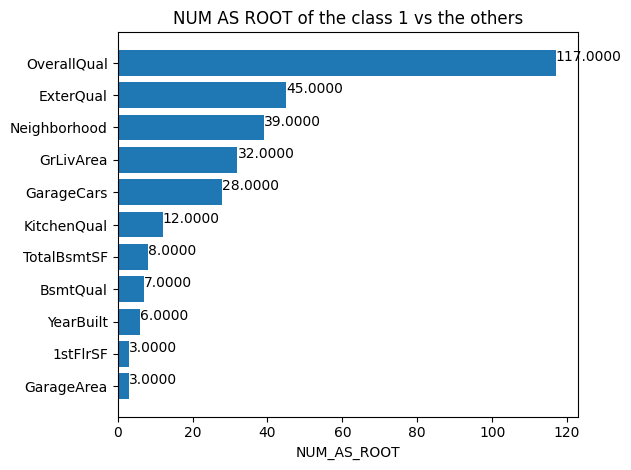

In [ ]:
# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

**Finally predict on the comptetion testdata using the model**

In [ ]:
test_data=pd.read_csv("/content/test.csv")
test_ds=tfdf.keras.pd_dataframe_to_tf_dataset(test_data,task=tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output=pd.DataFrame({"IDS":test_data.pop("Id"),"salesprices":preds.squeeze()})
output.head()


2/2 [==============================] - 0s 23ms/step


,IDS,salesprices
0,1461,130629.148438
1,1462,160095.718750
2,1463,179790.281250
3,1464,183588.656250
4,1465,212573.218750


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil